<a href="https://colab.research.google.com/github/nehal35/Cardiovascular_Risk_Prediction_Capstone_Project/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.**


# **Data Description**
**Demographic:**
• Sex: male or female("M" or "F")\
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")\
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)\
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)\
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)\
• Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**

• Tot Chol: total cholesterol level (Continuous)\
• Sys BP: systolic blood pressure (Continuous)\
• Dia BP: diastolic blood pressure (Continuous)\
• BMI: Body Mass Index (Continuous)\
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)\
• Glucose: glucose level (Continuous)
Predict variable (desired target)\
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -DV


# **Data Preparation**
## **Importing and Inspecting Dataset**

In [1]:
# importing required libraries 
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import  confusion_matrix,classification_report
from sklearn.metrics import make_scorer,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import  XGBRFClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.combine import SMOTETomek

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Cardiovascular_Risk_Prediction_Capstone_Project/Copy of data_cardiovascular_risk.csv')

In [3]:
data.shape


(3390, 17)

In [4]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
data.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
# dropping the id column
data.drop(columns=['id'],inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [8]:
data.describe(include='all',percentiles=(0.01,0.25,0.5,0.75,0.99))

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
1%,35.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,153.000000,96.94500,60.000000,18.252500,52.880000,55.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000


# **Missing Values Treatments**

In [9]:
# checking null values
print(data.isnull().sum().sort_values(ascending=False))
print('_ _*_ _'*10)
round(data.isnull().sum().sort_values(ascending=False)/len(data)*100,2)


glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
age                  0
sex                  0
is_smoking           0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64
_ _*_ __ _*_ __ _*_ __ _*_ __ _*_ __ _*_ __ _*_ __ _*_ __ _*_ __ _*_ _


glucose            8.97
education          2.57
BPMeds             1.30
totChol            1.12
cigsPerDay         0.65
BMI                0.41
heartRate          0.03
age                0.00
sex                0.00
is_smoking         0.00
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
sysBP              0.00
diaBP              0.00
TenYearCHD         0.00
dtype: float64

In [10]:
# Replacing null values with median
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
  data[col] = data[col].fillna(data[col].median())

In [11]:
data.nunique()

age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

# **Exploratory Data Analysis**

In [12]:
# Lets check the discrete and continuous features
categorical_features=[i for i in data.columns if data[i].nunique()<=4]
numeric_features=[i for i in data.columns if i not in categorical_features]
print(categorical_features)
print(numeric_features)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


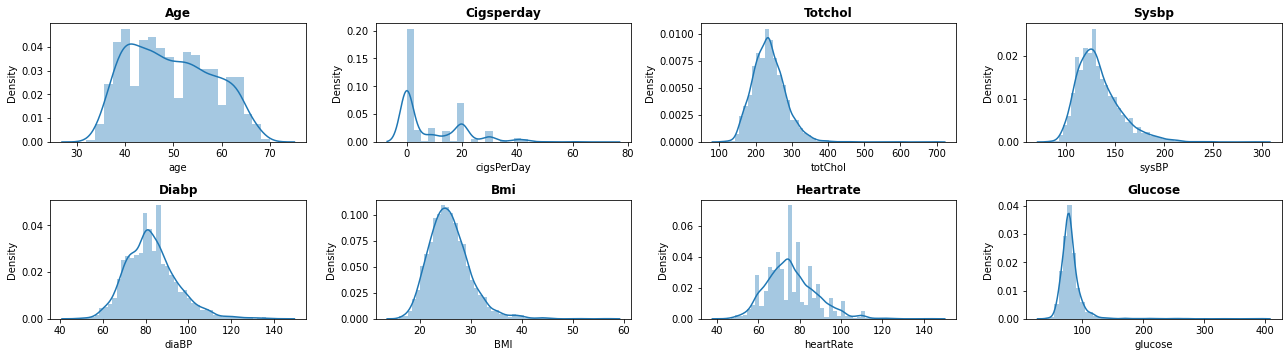

In [13]:
# visualizing the distributions
plt.figure(figsize=(18,12))
for n,column in enumerate(numeric_features):
   plt.subplot(5,4,n+1)
   sns.distplot(data[column])
   plt.title(f'{column.title()}',weight='bold')
   plt.tight_layout()

# **Handling Outliers**

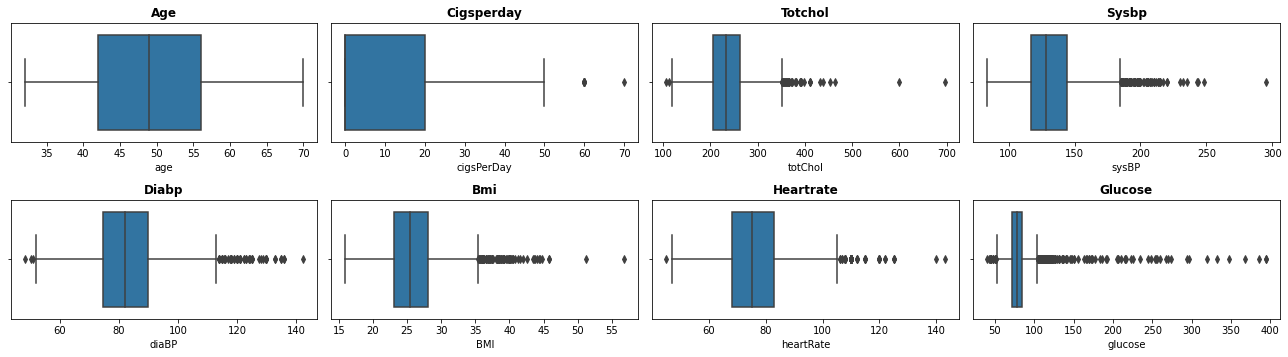

In [14]:
# visualizing the distribution
plt.figure(figsize=(18,12))
for n, column in enumerate(numeric_features):
   plt.subplot(5,4,n+1)
   sns.boxplot(data[column])
   plt.title(f'{column.title()}',weight='bold')
   plt.tight_layout()

In [15]:
# Removing outliers by standard method and plotting graph:
df=data.copy()
for col in numeric_features:
  q1,q3,median=df[col].quantile([0.25,0.75,0.5])
  lower_limit=q1-1.5*(q3-q1)
  upper_limit=q3+1.5*(q3-q1)
# replacing outliers with median value
  df[col]=np.where(df[col]>upper_limit,median,np.where(df[col]<lower_limit,median,df[col]))

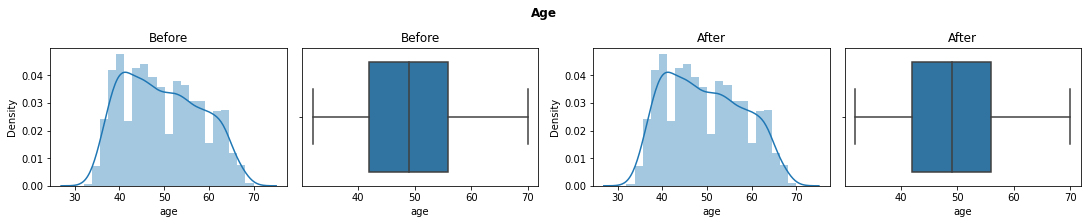

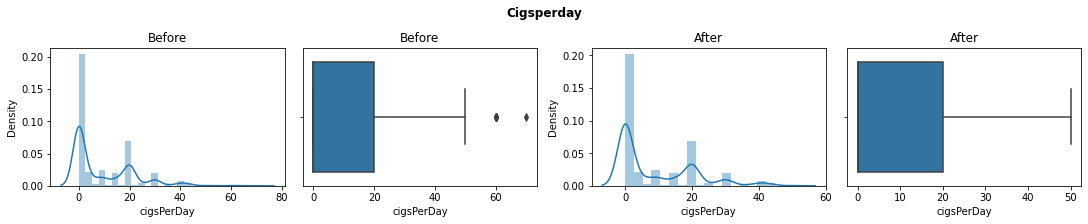

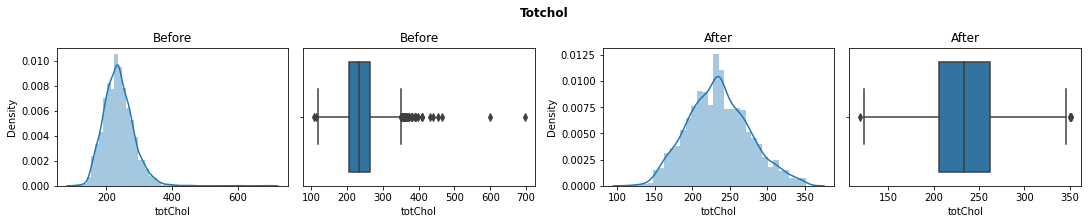

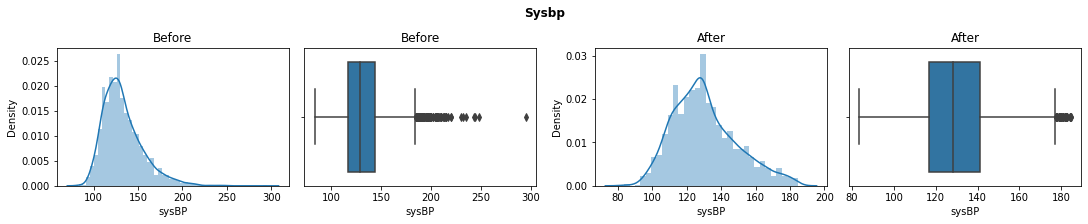

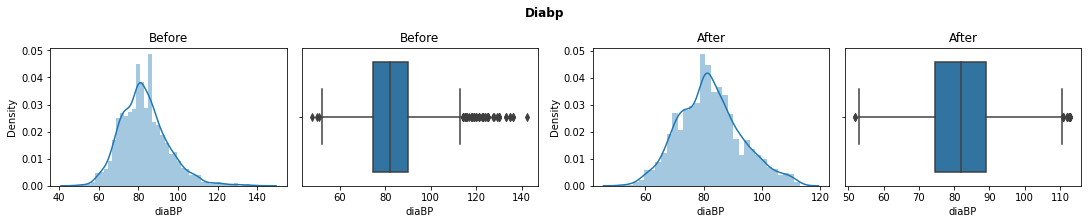

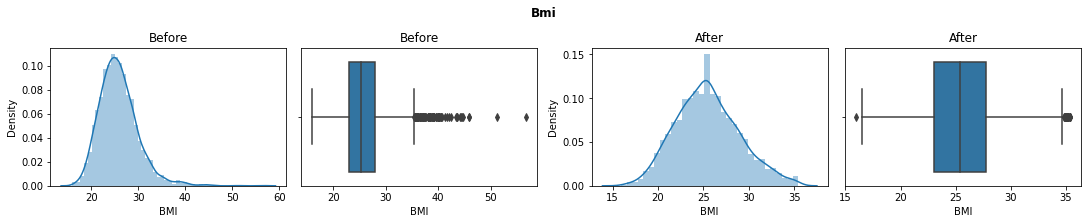

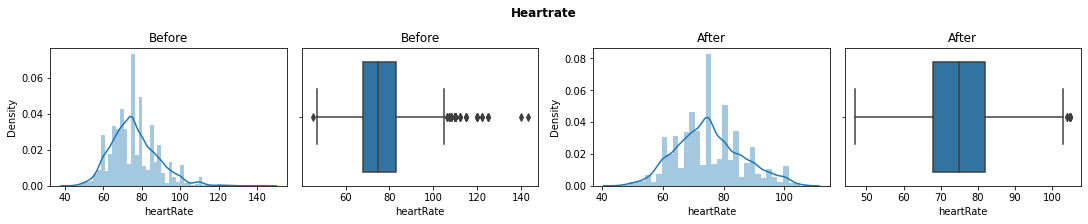

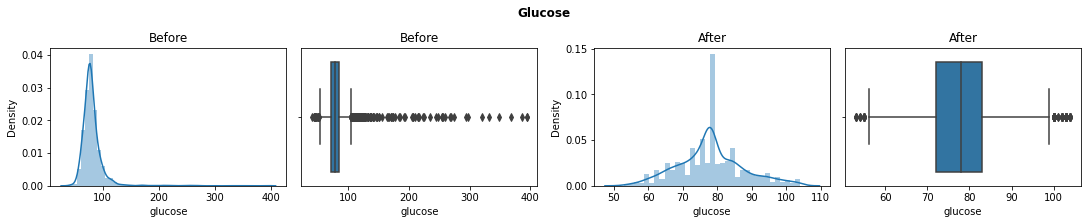

In [16]:

# plotting graphs before treating outliers
for col in numeric_features:
  fig,ax=plt.subplots(1,4,constrained_layout=True)
  fig.set_size_inches(15,3)
  sns.distplot(data[col],ax=ax[0]).set(title='Before')
  sns.boxplot(data[col],ax=ax[1]).set(title='Before')
# after treating outliers
  sns.distplot(df[col],ax=ax[2]).set(title="After")
  sns.boxplot(df[col],ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight="bold")
  fig.show()

In [17]:
# duplicate
len(df[df.duplicated()])

0

# **Univariate Analysis**

In [18]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
  '''Takes axes as input and labels the percent count of each bar in a countplot'''
  for p in plot.patches:
    total= sum(p.get_height() for p in plot.patches)/100
    percent=round((p.get_height()/total),2)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    plot.annotate(f'{percent}%',(x,y),ha='center',va='bottom') 


In [19]:
# defining r to autofit the number and size of plots
r=np.ceil(len(data.columns)/3)

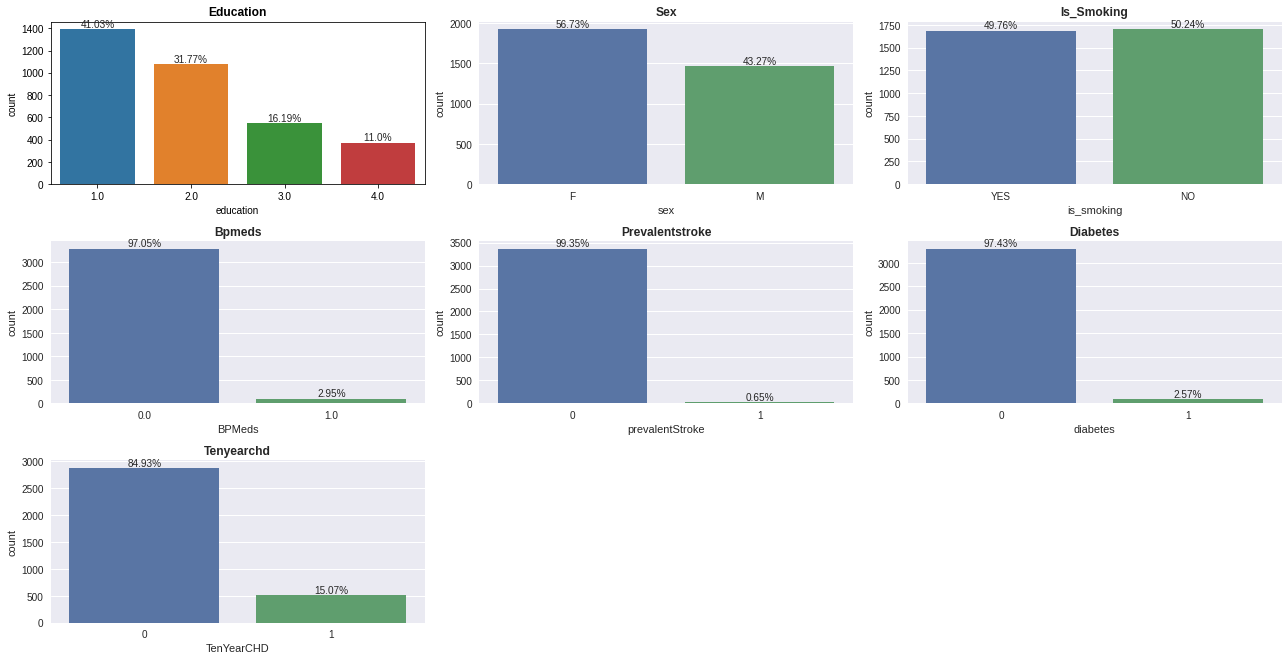

In [20]:
n=1
plt.figure(figsize=(18,r*3))
for column in ['education', 'sex', 'is_smoking', 'BPMeds',
       'prevalentStroke', 'diabetes',
        'TenYearCHD']:
  plot = plt.subplot(r,3,n)
  n = n+1
  sns.countplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.style.use('seaborn')
  plt.tight_layout()
  annot_percent(plot)

# **Cleaning and Manipulating dataset**

In [23]:
# checking unique value with their counts in categorical features
for col in ['sex','is_smoking','TenYearCHD']:
  print(df[col].value_counts(),'\n')

F    1923
M    1467
Name: sex, dtype: int64 

NO     1703
YES    1687
Name: is_smoking, dtype: int64 

0    2879
1     511
Name: TenYearCHD, dtype: int64 



In [26]:
# defining a label encoder based on above data
encoder={'sex':{'M':1,'F':0},'is_smoking':{'YES':1,'NO':0}}

# label Encoding
df=df.replace(encoder)

In [27]:
# checking whether all features are bumeric or not 
len(df.columns)==len(df.describe().columns)

True

# **Visualising Static of data**

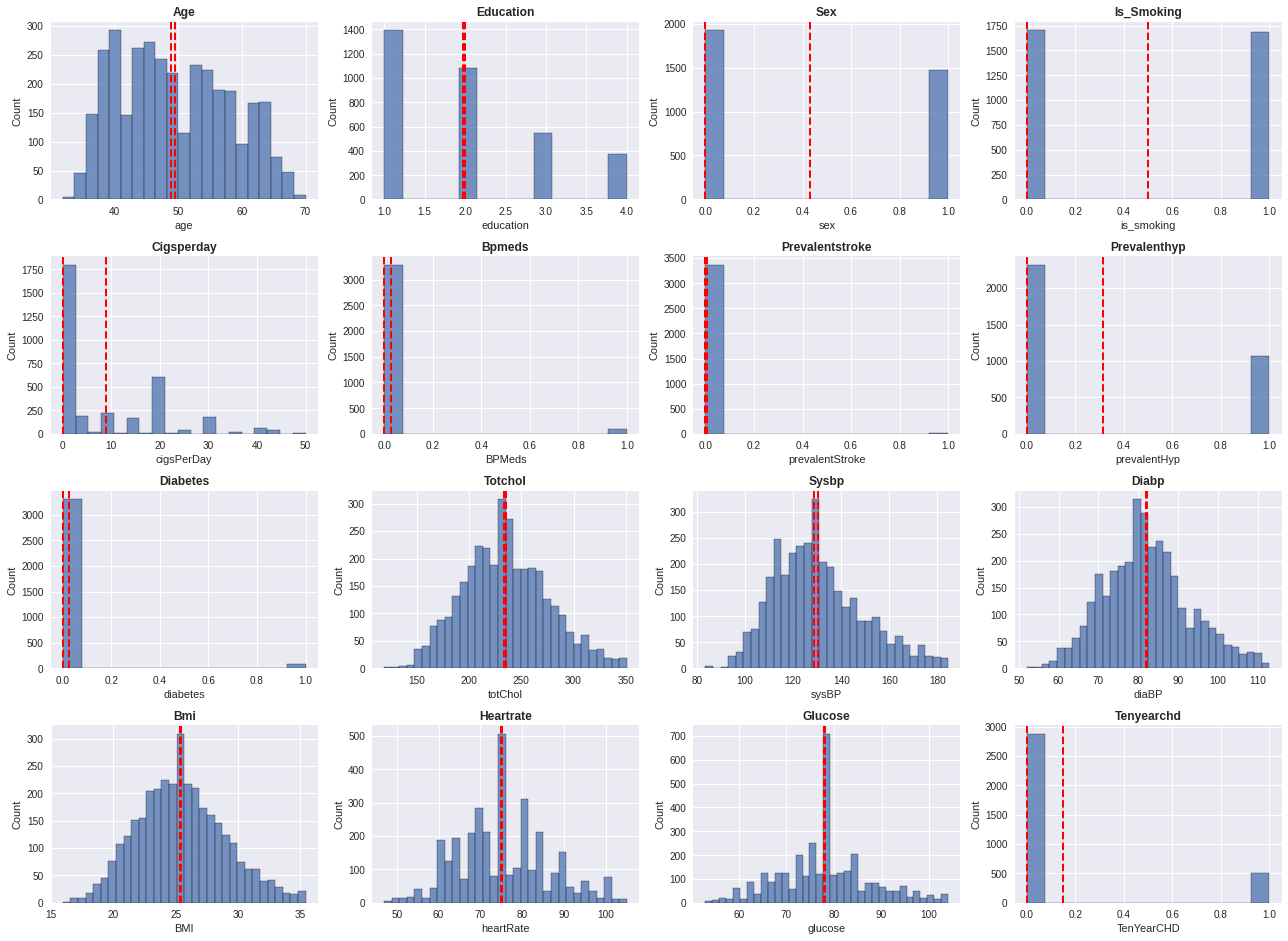

In [32]:
# visualizing the mean and median.
plt.figure(figsize=(18,16))
for n,column in enumerate(df.columns):
  feature=df[column]
  ax=plt.subplot(5,4,n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(),color='red',linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='red',linestyle='dashed',linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

# **Bivariate Analysis**

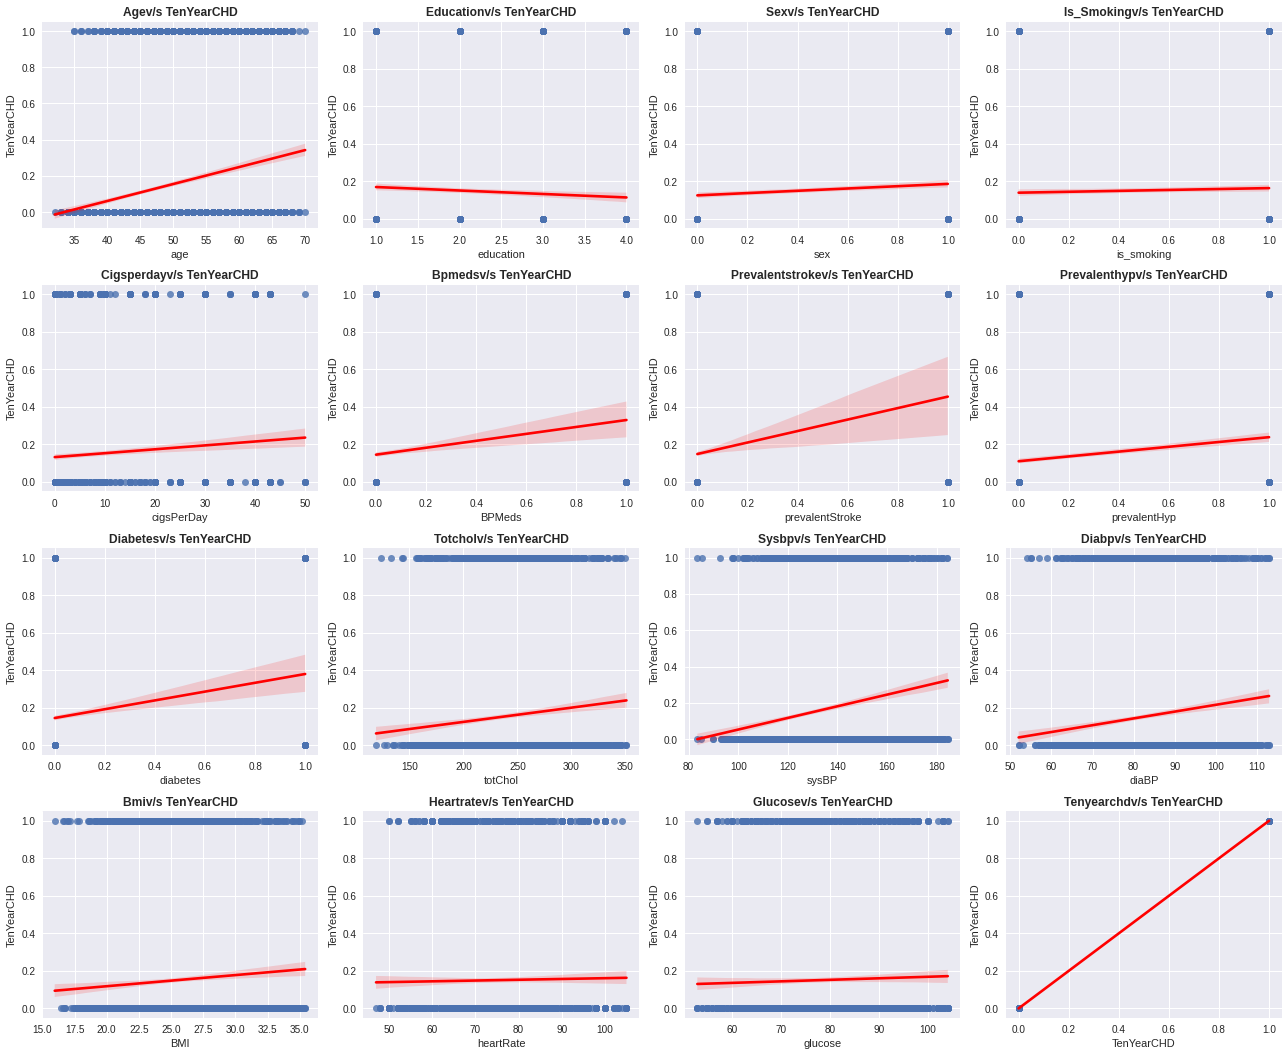

In [37]:
# Checking Linearity
independent_variables=[i for i in df.columns if i not in ['TenYearCHD']]
plt.figure(figsize=(18,18))
for n,column in enumerate(df.columns):
  plt.subplot(5,4,n+1)
  sns.regplot(x=df[column],y=df['TenYearCHD'],line_kws= {"color":"red"})
  plt.title(f'{column.title()}v/s TenYearCHD',weight='bold')
  plt.tight_layout()

# **Removing Multicolinearity**

In [42]:
# Defining a function to calculate variance inflation factor
def cal_vif(X):
  # calculating VIF
  vif=pd.dataframe()
  vif["variables"]=x.columns
  vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(X.shape[1])]
  return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. VIF score of an independent variable represents how well the variable is explained by other independent variables.

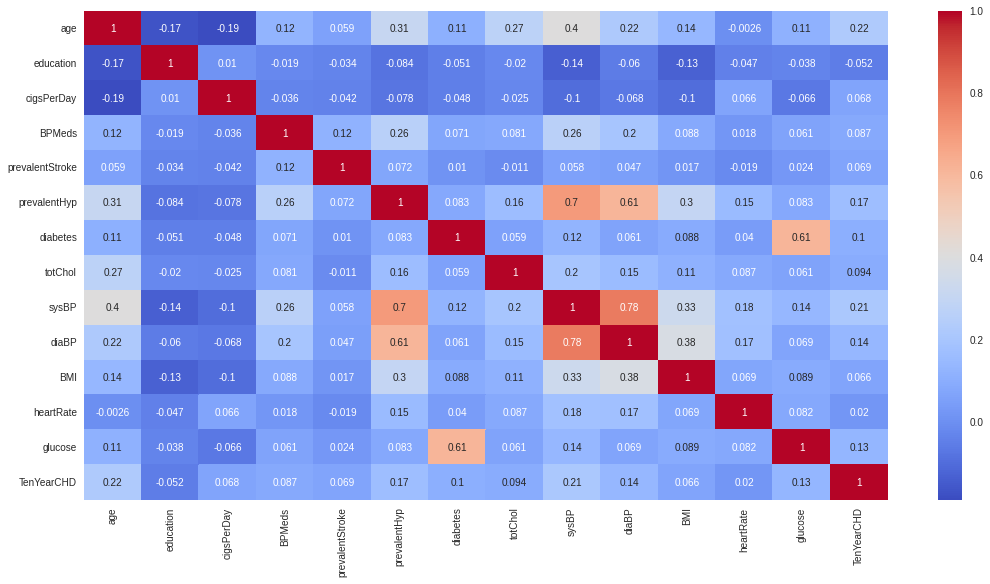

In [43]:
#  annot=True, cmap='coolwarm'
plt.figure(figsize=(18,9))
sns.heatmap(data[data.describe().columns].corr(),annot=True, cmap='coolwarm')